In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sbn
import matplotlib.gridspec as gridspec
from matplotlib import cm

/usr/local/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# query = """ 
#     select dq.event_date, c.label, dq.close_value
#     from company c
#     inner join daily_quote dq on c.id = dq.company_id
#     where c.label in (
#          'ITSA3', 'EGIE3', 'ITUB3', 'BRSR6', 'FESA4', 'ABCB4', 'ENBR3', 'GRND3', 'FRAS3', 'CSAN3')
#     and (now() - dq.event_date) <= interval '3 months'
#     order by dq.event_date;"""
query = """ 
    select dq.event_date, c.label, dq.close_value
    from company c
    inner join daily_quote dq on c.id = dq.company_id
    where c.label in (
         'MPLU3', 'UNIP3', 'ELET6', 'ECOR3', 'FLRY3', 'ITSA3', 'LREN3', 'BBDC4', 'FRAS3', 'ITSA4', 'RENT3', 'BRSR6', 'EQTL3', 'CPLE6', 'EMBR3', 'PETR3', 'PTBL3', 'NATU3', 'SAPR3', 'PSSA3')
    and (now() - dq.event_date) <= interval '4.5 months'     
    order by dq.event_date;"""

In [3]:
conn = psycopg2.connect(
            database="postgres",
            user="postgres",
            connect_timeout=3,
            options='-c statement_timeout=3000')
raw_df = pd.read_sql(query, conn)
conn.close()

In [4]:
raw_df.columns = ['Data', 'Sigla', 'VF']
raw_df.set_index(['Data', 'Sigla'], inplace=True)

In [5]:
df = (raw_df.unstack()
      .replace({0: np.NaN})
      .fillna(method='ffill'))
df.tail()

VF                                                         \
Sigla       BBDC4  BRSR6  CPLE6  ECOR3  ELET6  EMBR3  EQTL3  FLRY3 FRAS3   
Data                                                                       
2019-02-25  44.15  25.49  34.40  10.95  39.49  19.40  83.99  20.37  4.98   
2019-02-26  44.94  25.68  34.80  11.00  39.32  19.70  83.61  20.20  4.96   
2019-02-27  44.44  25.20  35.77  11.20  40.75  19.35  82.98  20.62  5.07   
2019-02-28  43.27  25.00  35.74  11.32  38.97  19.08  82.13  20.00  5.01   
2019-03-01  42.55  25.12  35.30  11.10  37.49  18.96  82.47  20.00  5.05   

                                                                          \
Sigla       ITSA3  ITSA4  LREN3  MPLU3  NATU3  PETR3  PSSA3 PTBL3  RENT3   
Data                                                                       
2019-02-25  15.41  12.81  44.39  26.51  49.87  30.50  59.00  5.31  34.84   
2019-02-26  15.21  12.82  44.40  26.50  49.10  30.51  57.55  5.30  35.10   
2019-02-27  15.30  12.64  44.05  26.46  48.20  30.67  57.29  5.26  34.61   
2019-02-28  15.00  12.37  43.28  26.67  48.38  29.86  56.04  5.20  34.55   
2019-03-01  14.97  12.26  43.33  26.60  47.50  29.20  55.69  5.10  33.60   

                          
Sigla       SAPR3  UNIP3  
Data                      
2019-02-25  21.50  39.70  
2019-02-26  21.25  39.85  
2019-02-27  22.14  39.40  
2019-02-28  21.30  39.49  
2019-03-01  22.35  39.20

In [6]:
df = df['VF']

In [7]:
columns = pd.Series(df.columns.values)

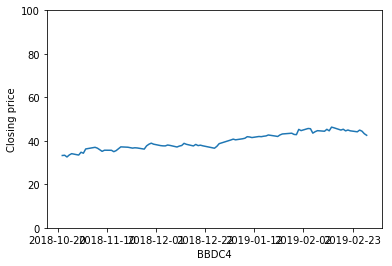

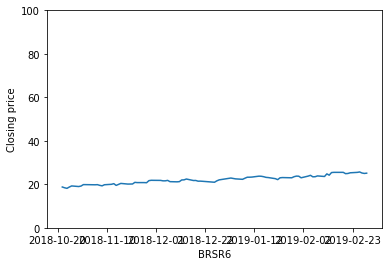

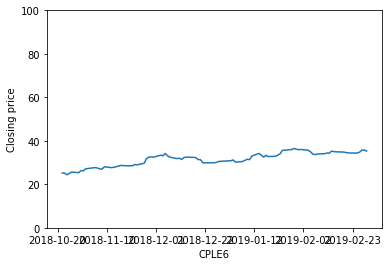

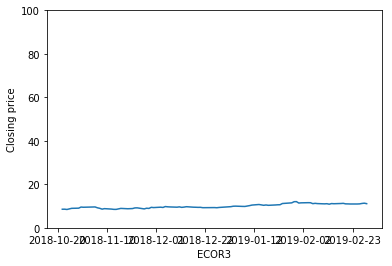

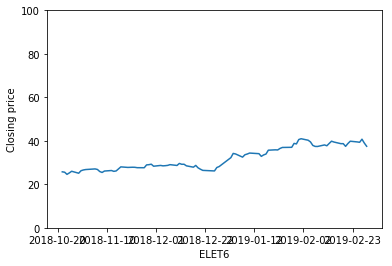

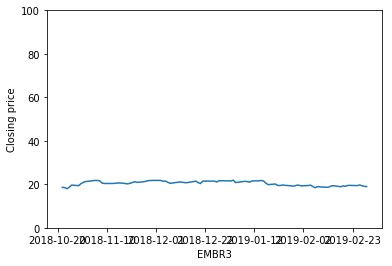

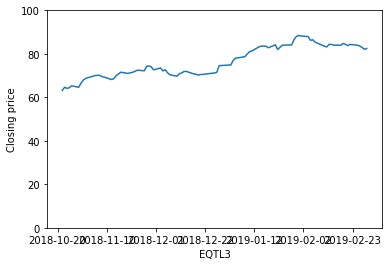

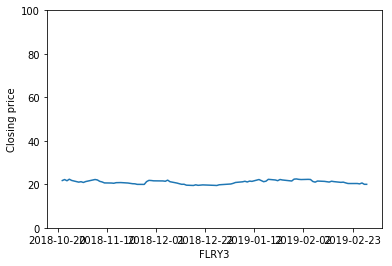

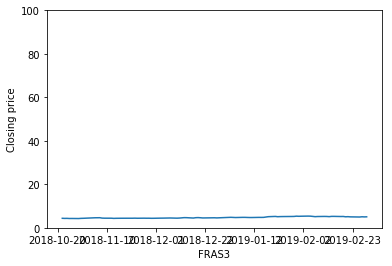

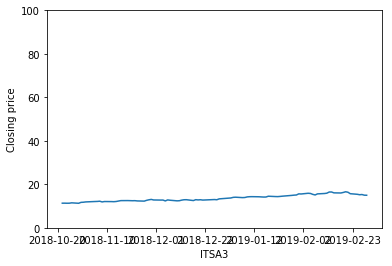

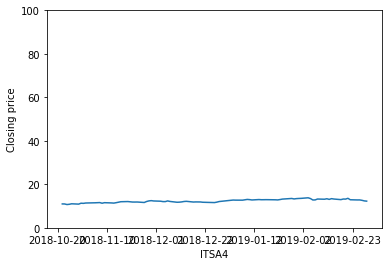

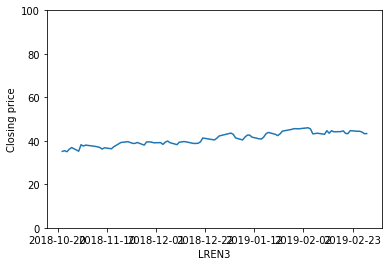

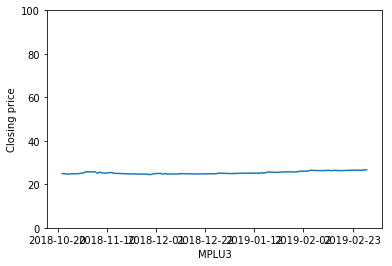

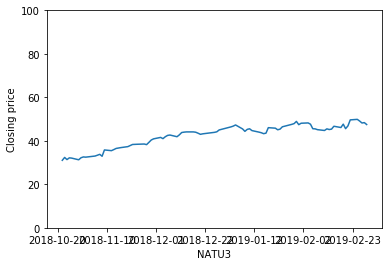

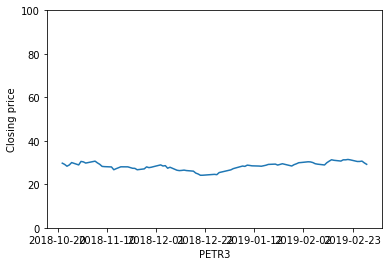

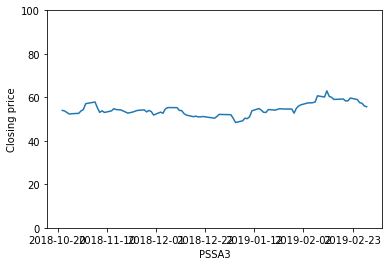

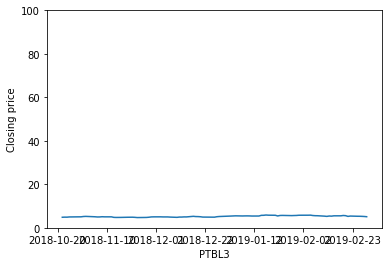

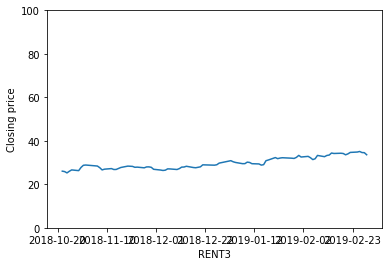

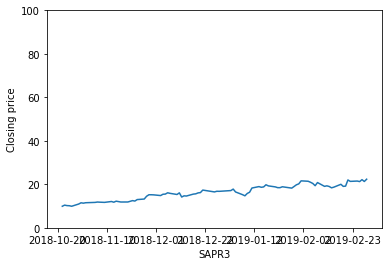

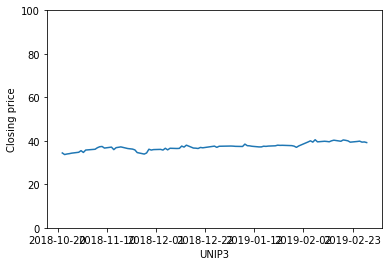

In [8]:
row = 0
column = 0
gs = gridspec.GridSpec(5, 2)
for label in df:
    fig = plt.figure()
    company = df[label]
    props = {
        'title': company.name
    }
    #print(str(row) + ' - ' + str(column))
    plt.subplot()
    #     ax = plt.gca()
    #     ax.label = company.name
    plt.ylabel('Closing price')
    plt.xlabel(company.name)
    plt.ylim(0, 100)
    plt.plot(df.index.values, company)
    # company.plot(ax=ax, style='b-')
    # ax.set(**props)
    if column >= 1:
        column = 0
    else:
        column += 1

    if column == 0:
        row += 1
        

# Normalizando os papéis
Todas as cotações serão divididas pela cotação inicial para prover um ponto de início em comum

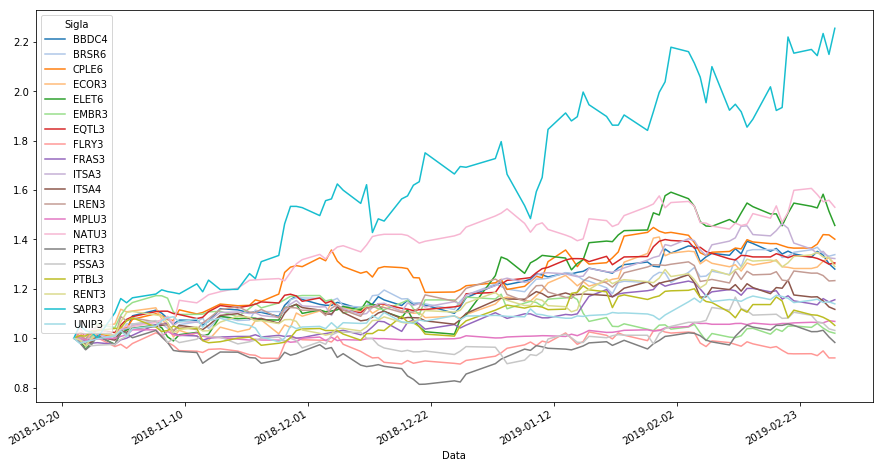

In [9]:
cm = plt.cm.get_cmap('tab20')
first_row = df.iloc[0]
ndf = df / first_row
ndf.plot(figsize=(15, 8), color=cm.colors)
plt.show()

Sigla
BBDC4    498.652299
BRSR6    221.928736
CPLE6    237.523276
ECOR3    174.650000
ELET6    640.988506
EMBR3    152.491379
EQTL3    573.974138
FLRY3    315.668966
FRAS3     59.396552
ITSA3    204.925862
ITSA4    123.493103
LREN3    613.439655
MPLU3    951.862069
NATU3    316.862931
PETR3    213.833621
PSSA3    272.628161
PTBL3     39.304310
RENT3    297.828736
SAPR3     81.436782
UNIP3    746.581862
dtype: float64


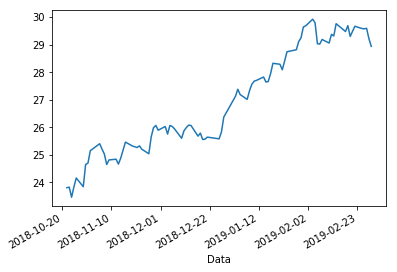

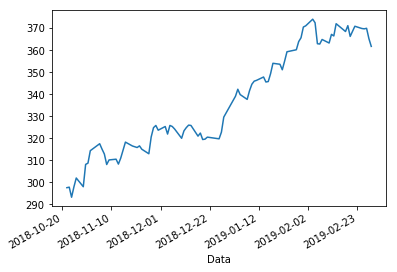

In [10]:

percentages = [(15.0, 'MPLU3'), (8.0, 'UNIP3'), (8.0, 'ELET6'), (7.0, 'ECOR3'), (6.0, 'FLRY3'), (6.0, 'ITSA3'), (6.0, 'LREN3'), (5.0, 'BBDC4'), (5.0, 'FRAS3'), (4.0, 'ITSA4'), (4.0, 'RENT3'), (4.0, 'BRSR6'), (3.0, 'EQTL3'), (3.0, 'CPLE6'), (3.0, 'EMBR3'), (3.0, 'PETR3'), (3.0, 'PTBL3'), (3.0, 'NATU3'), (2.0, 'SAPR3'), (2.0, 'PSSA3')]

virtual_portfolio = df.copy()

for (weight, asset) in percentages:
    virtual_portfolio[asset] = virtual_portfolio[asset] * weight / 100.0

old_virtual_portfolio = np.sum(virtual_portfolio, axis=1)
plt.figure()
old_virtual_portfolio.plot()

plt.figure()
new_virtual_portfolio = np.mean(virtual_portfolio, axis=1) * 250
new_virtual_portfolio.plot()

annual_returns = np.mean(virtual_portfolio) * 250
print(annual_returns)

In [11]:
initial_value = old_virtual_portfolio.iloc[0]
current_value = old_virtual_portfolio.iloc[-1]
profit = current_value - initial_value


# Lucro nominal e percentual

In [12]:
print('Lucro nominal=%s; Lucro percentual=%s' % (profit, profit/initial_value))

Lucro nominal=5.127735999999992; Lucro percentual=0.2153754033666484
